# Detroit Open Demolitions 
### Public X Design Workshop, Detroit, Sep, 2018 
#### We are Avigail Vantu (avigailvantu@gmail.com) & Eitan Akman (eitanakman@gmail.com), we are both cities, tech and data enthusiastic based in Brookyln, NY and are very excited to be visting Detroit. 

# ****EA link to notebooks + explaining bugs and scenarios along the lab**** 

Hey there! Welcome to our workshop! 

All are welcome, and there are no prerequisiten needed to participate. Today we want to use data to better understand Detroit's demolitions policies. All of the data we will be working on in these session is released as open data - meaning it is accessible online for everyone to use. In particular, Detroit's Open Data Portal was used in this notebook descriptives and analysis: https://data.detroitmi.gov/ 

### Agenda: 
    1. Introduction: 
        a. Workshop Objectives 
        b. Intro to Open data  / databases , Jupyter, and Python
    2. Demolitions Data
    3. Measuring Demolitions Impact
        a. Crime
        b. Real Estate
    5. Conclusions / discussion 
    6. Extra
        a. 311 data
    

## 1. Intro

### a. Workshop Objectives: 

### Here's a map of the Demolitions in Detroit colored by Neighborhoods  - we will be diving deep into this data very soon.  We'll munge data, visualize and plot the data. 


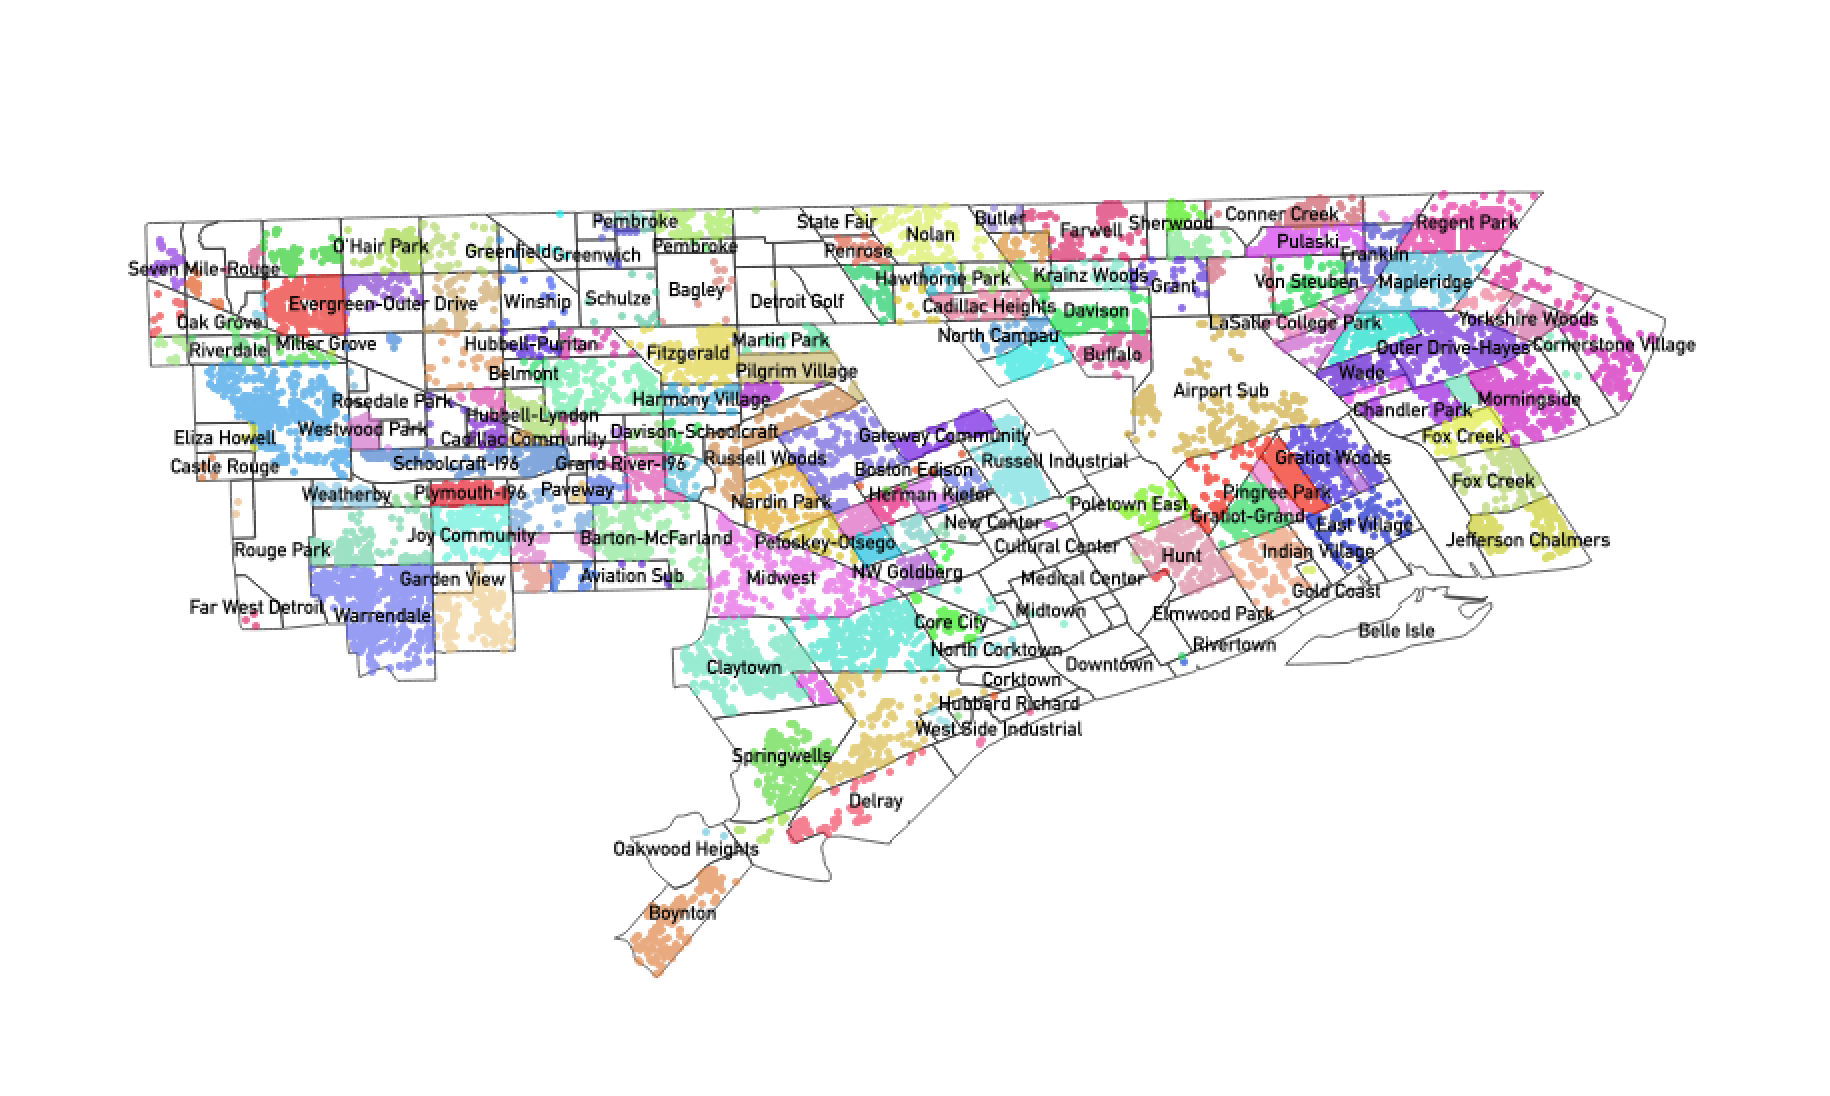

In [1]:
from IPython.display import Image
Image(filename='TotalDemoPerNighDetroit.png')


### b. Tutorials

###  But first thing first -- let's go through some core functionalities about Python Jupyter notebooks.

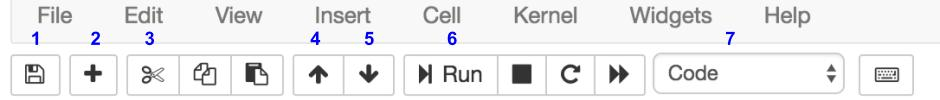

In [2]:

Image(filename='jupyter_menu.jpg')
 

### To simplify things here's a copy of the upper menu you all see in your Jupyter notebooks and it is numbered 1-7. 

- 1 simply saves your work similiar to other types of docs
- 2 is used in order to add a new IN cell 
- If you make a mistake or just don't need a specific cell anymore, press 3 to crop it. Carfeull not clicking it by accident when trying to add a cell..  
- 4 shifts the chosen cell one spot higher in your notebook and 5 does the same but toward down 
- 6 is used to run the chosen cell, this will genenrate the cell's output 
- 7 is used to change a cell's funcilnality, the two main ones we will use today is: code (defeault) and Markdown which is mainly used to write comments and titels.

#### More useful things: 

- if the notebook is stuck, or if you want to restart it - go to 'Kernel' and click - 'Restart'
- if you only want to run parts of the notebook - go to 'Cell' and choose the most suitable options: (Run All, Run All Above and Run All Bellow are some of the popular ones).
- To save a copy of your work, go to File - Download As : we recommend HTML or IPYNB to restore with viz
- To run a cell using only the keyboard press shift-return at the same time. 

#### Now, let's practice some of what we've learned: 

Please create 3 new cells

1. In the first cell: 

print ("Hello Detroit, I'm *your name* !" )

2. in the second cell: 
Sum up your birthday digits (month + day + year) 
Hint: write an equation using plus sings and exlcuding the = sign 

3. Define variable of your choice (* = number / equation) and then: print (the variable)


In [3]:
# <your code>

#### Great! 

Now change the order of the cells so that instead of 1,2,3 they are ordered 3,1,2. Got it? 

If you want to expend your Jupyter and Pandas in psrtcular knowldge we recommend strating with :http://pandas.pydata.org/pandas-docs/version/0.15.2/tutorials.html

### Coding tools, packages and languages: 
Today we will be using Python and in particular Pandas and Geopandas as toolf of data manipulation, cleaning, merging, visualzation, plotting and many more fanctionalitites that make working with big spreadhsheets easier. 

import the programs we need for the workshop:

In [4]:
#import packages

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


## 3.  Demolitions 

### Read datasets
We will be loading CSV files, which are similiar to spreadsheets and, and GeoJson which is a geographical data format mainly used to represen points and polygons.  

First let's load the demolitions data which is downloaded from the Detroit open data portal in a CSV format, Pandas will trasnform it into a DataFrame, which is a two-dimensional format ( bascially columns and rows). Values can be numeric, string, boolean etc.

In [5]:
#load Demolitions data 
demolitions = pd.read_csv('Detroit_Demolitions.csv')

In [6]:
#how many demolitions over the years 2014-2018
print ("The total number of demolitions is:",len(demolitions))

The total number of demolitions is: 14524


In [7]:
# remove NaN's  
#demolitions = demolitions.dropna()

### Demolitions Cost 

In [8]:
print ("The total price of demolitions is $" + str(demolitions['Price'].sum() / 1000000)+"M")

The total price of demolitions is $228.31201243M


In [9]:
#group by neighborhoods to have the total price for demolitions for each
dem = demolitions.groupby(['Neighborhood']).sum()



In [10]:
#data cleaning and sorting
def my_demolition_cleaning_function(dem):
    del dem['Council_District']
    del dem['Latitude']
    del dem['Longitude']
    

#run the cleaning function  
my_demolition_cleaning_function(dem) 

#now let's sort the data so that the lowest priced neighborhood will apear first 



In [11]:
# to make it easiar to interact with let's create a new column which equals to the index (== Neighborhood)
dem['Neighborhood'] = dem.index
dem = dem.sort_values(by='Price')
# dem is a DF with USD spent on demolitions by neighborhood 
#let's see how does it looks like
dem.head(4)

,Price,Neighborhood
Neighborhood,,
Greenwich,9310.0,Greenwich
Green Acres,13726.0,Green Acres
McNichols Evergreen,13900.0,McNichols Evergreen
Rivertown,16550.0,Rivertown


This dataframe summs up all numerical columns (price, council district, Lat, Lon). However, except for price, all columns agragated this way actually have no meaning so they are noise we actually want to remove from the data. 
Let's do that:



Now that looks better, but let's try to better understand the cost of demolitions by neighborhood. Eyeballing the dataframe makes it a little hard to come up with meaningful conclusions..  
Ploting the data will make it easier to grasp. Let's do it 


In [12]:
print ("four least demolitions funded neighborhoods in Detroit are:",dem.head(4))
print ("four most demolitions funded neighborhoods in Detroit are:",dem.tail(4))

four least demolitions funded neighborhoods in Detroit are:                        Price         Neighborhood
Neighborhood                                     
Greenwich             9310.0            Greenwich
Green Acres          13726.0          Green Acres
McNichols Evergreen  13900.0  McNichols Evergreen
Rivertown            16550.0            Rivertown
four most demolitions funded neighborhoods in Detroit are:                         Price       Neighborhood
Neighborhood                                    
Claytown           6096510.79           Claytown
Dexter-Linwood     6328961.55     Dexter-Linwood
Holcomb Community  6897702.58  Holcomb Community
Warrendale         9494484.32         Warrendale


In [13]:
# The most money for demolitions was spent in Warrendale :$9,494,484 Millions
dem[dem['Price'] ==9494484.319999998]

,Price,Neighborhood
Neighborhood,,
Warrendale,9494484.32,Warrendale


### Task I: 
Can you try and calculate the mean cost of demolitions per neighborhood? 

Hint: use dem as your work dataframe, "Price" is the column which we want to get the mean of
* you may want to use this function: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html

In [14]:
# <your code> 



So we can see that more than 9 Million USD were spent on demolitions in the neoghborhood of Warrendale, and only 9,000 USD were sepent in Greenwich

### Number of Demolitions per Neighborhood

In [15]:
#Aggragate number of demolitions by neighborhood 

demolitionsnum = demolitions.groupby(['Neighborhood']).count()

In [16]:
# re organize DataFrame for count per neigh
def my_demolition_organize_function(demolitionsnum):
    # recreate a the neighborhood column
    demolitionsnum['Neighborhood'] = demolitionsnum.index
    # rename column
    demolitionsnum['DemCount'] = demolitionsnum['Address']
    
    

my_demolition_organize_function(demolitionsnum) 


In [17]:
# remove all columns but the relelvent ones
demolitionsnum = demolitionsnum[['Neighborhood','DemCount']]
# and display our re organize dataframe
print (demolitionsnum.head())

                      Neighborhood  DemCount
Neighborhood                                
Airport Sub            Airport Sub       218
Aviation Sub          Aviation Sub         4
Bagley                      Bagley        10
Barton-McFarland  Barton-McFarland       192
Belmont                    Belmont         8


In [18]:
#demolitionsnum['DemCount'].max() 

# the most demolitions condeucted in Warrendale - 653
print ( "The neighborhood with the highest number of demolitions is", demolitionsnum[demolitionsnum['DemCount'] ==653])

The neighborhood with the highest number of demolitions is              Neighborhood  DemCount
Neighborhood                       
Warrendale     Warrendale       653


Normalize Demolitions counts by area size of neighborhood 

In [19]:
#to get size load neighborhoods ploygons whixh have acres attribute
DetroitNeighborhoods = gpd.read_file('DetroitNeighborhoods.geojson')

In [20]:
#re organize data: 
# 1. unify column name 
DetroitNeighborhoods['Neighborhood'] = DetroitNeighborhoods['new_nhood']
# 1. only leave neighborhood and area: 
DetroitNeighborhoods = DetroitNeighborhoods[['Neighborhood','acres']]

# merge
Demolition_Area = pd.merge(DetroitNeighborhoods,  demolitionsnum, on = 'Neighborhood', how = "inner")

# convert data type to float to avoid issues manipulating later
Demolition_Area['acres'] = (Demolition_Area['acres']).astype('float64')

#see how it looks like
Demolition_Area.head()

/Users/avigailvantu/anaconda2/envs/myenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: 'Neighborhood' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,Neighborhood,acres,DemCount
0,West End,1086.498842,194
1,Chandler Park,496.783595,98
2,Riverbend,1159.775632,131
3,Jefferson Chalmers,901.711919,189
4,Morningside,964.174072,315


In [21]:
# Normalize calculate per number of demolitions / area * 100 
Demolition_Area['normalized_demo'] = ((Demolition_Area['DemCount'] /  Demolition_Area['acres'])*1000)
# see how it looks like: 
Demolition_Area.head()

,Neighborhood,acres,DemCount,normalized_demo
0,West End,1086.498842,194,178.555183
1,Chandler Park,496.783595,98,197.268994
2,Riverbend,1159.775632,131,112.952882
3,Jefferson Chalmers,901.711919,189,209.601311
4,Morningside,964.174072,315,326.704491


"normalized_demo" is the number of demolitions per 100 acres

#### Sort by # of Demolitions & Plot

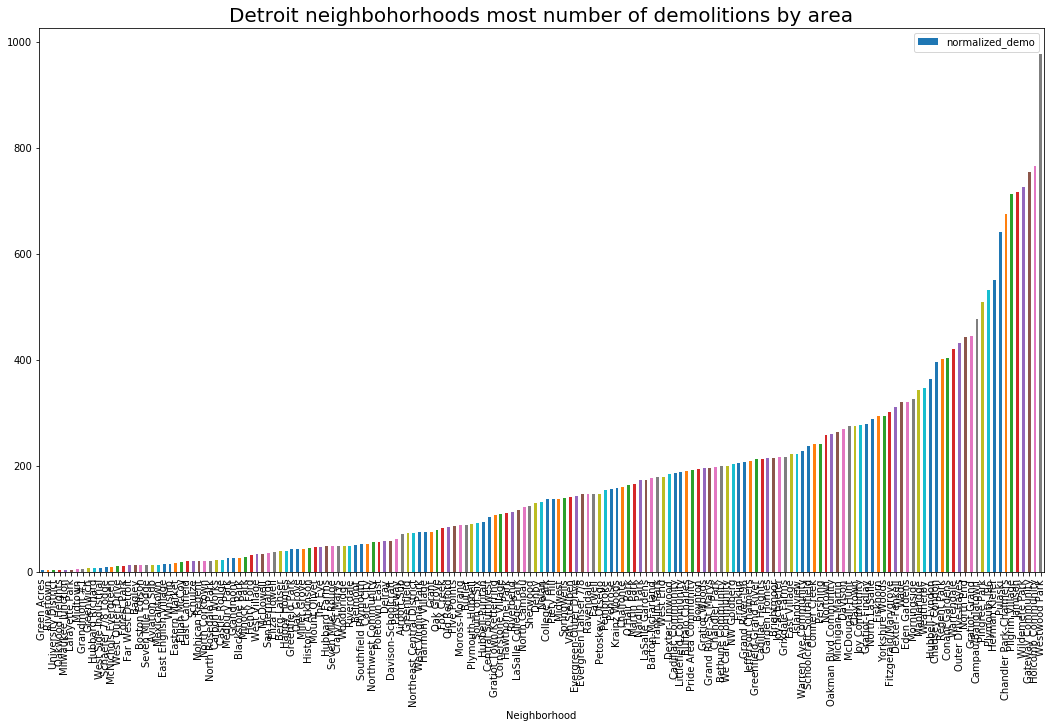

In [22]:
#Let's sort and plot demolitions by neighborhood

# sort: 
Demolition_Area = Demolition_Area.sort_values(by='normalized_demo')

#plot : figure size, and then define which data are we ploting 

ax = Demolition_Area.plot.bar(x='Neighborhood', y='normalized_demo',figsize=(18,10))
plt.title('Detroit neighbohorhoods most number of demolitions by area',  fontsize=20)

plt.show()

The (large) number of hoods make bars very tiny and hard to derive information from. 

In [23]:
#let's see how many neghbohoords do we actually have 
len(Demolition_Area)


173

Let's try and plot the top 20% which are 34 neighborhoods 

In [24]:
# take 
Demolition_Area_tail = Demolition_Area.tail(34)
#view the hoods
Demolition_Area_tail.tail()

,Neighborhood,acres,DemCount,normalized_demo
106,Jamison,154.757930,111,717.249191
105,Wildemere Park,170.542736,124,727.090480
123,Gateway Community,180.011811,136,755.505983
148,Holcomb Community,632.622318,485,766.650157
16,Westwood Park,162.618412,159,977.749066


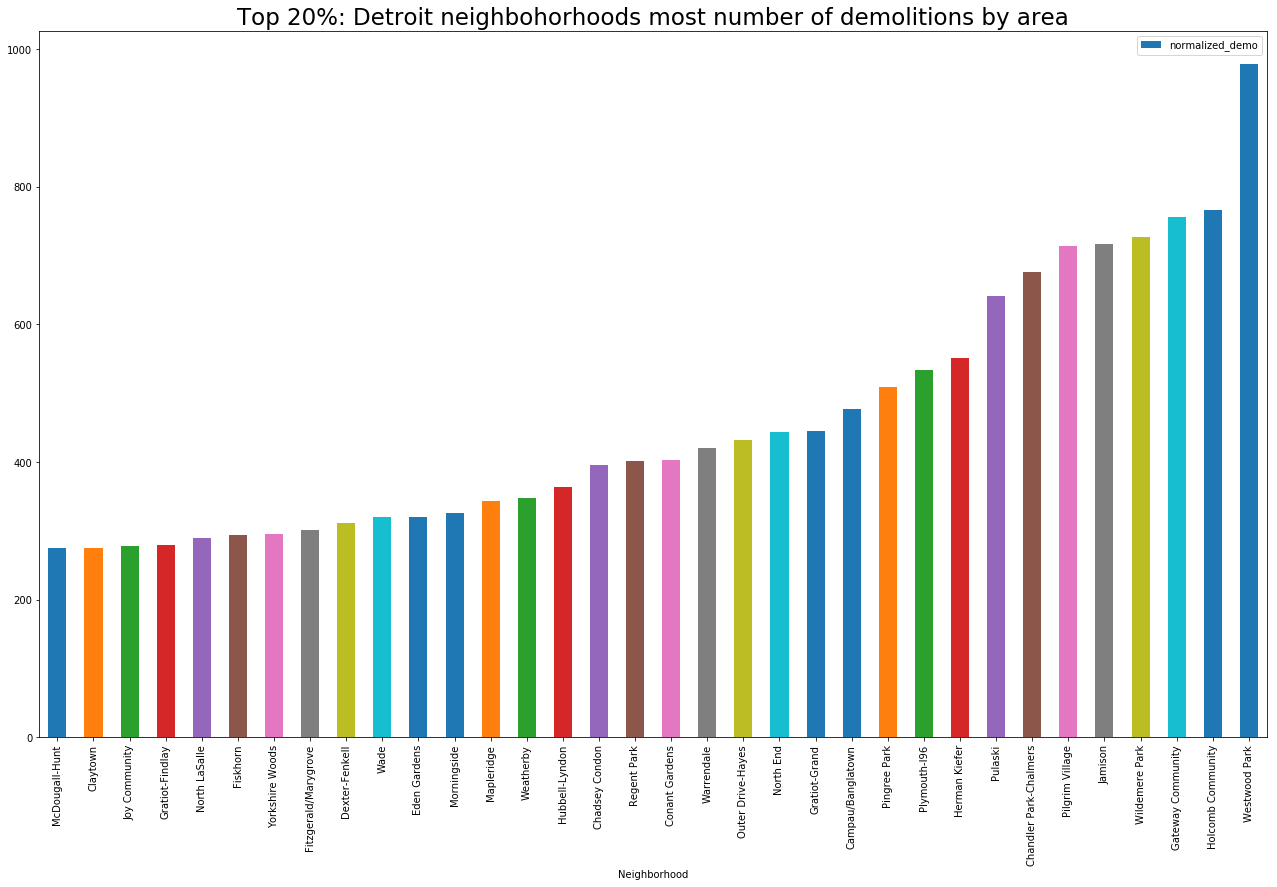

In [25]:
#plot top 34 

ax = Demolition_Area_tail.plot.bar(x='Neighborhood', y='normalized_demo',figsize=(22,13))
plt.title('Top 20%: Detroit neighbohorhoods most number of demolitions by area',  fontsize=23)
plt.show()

Which infromation are we getting out of this viz? 

## Just for fun: Plot Demolitions 

In [26]:
#from shapely.geometry import Point

In [27]:
# Demolitions DF to GeoDF 

from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(demolitions.Longitude, demolitions.Latitude)]
#remove unuseful column
demolitions = demolitions.drop(['Longitude', 'Latitude'], axis=1)
# set projection
crs = {'init': 'epsg:4326'}
#create a new DataFrame for the geo points 
gdf = gpd.GeoDataFrame(demolitions, crs=crs, geometry=geometry)

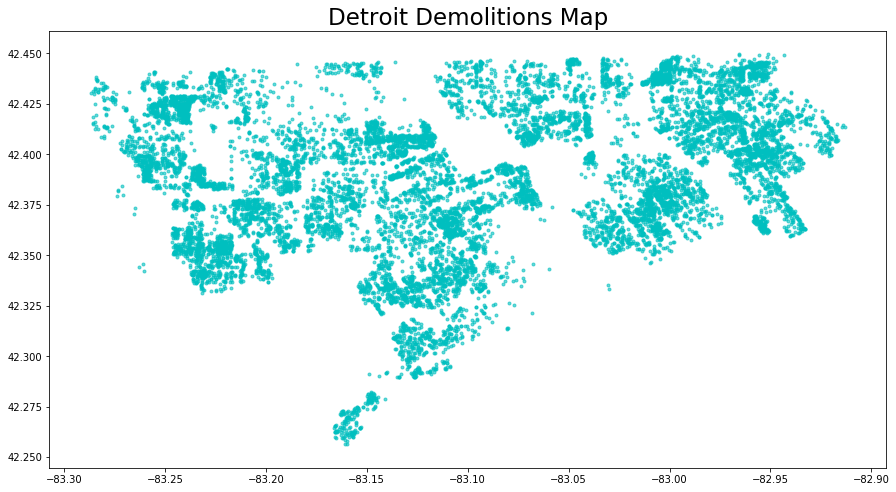

In [28]:
#plot
f, ax = plt.subplots(1,figsize = (15,16))
gdf.plot(c='c',marker='.',ax=ax, alpha=0.6)
plt.title('Detroit Demolitions Map',  fontsize=23)
plt.show()

## 3. Demolitions impact
#### How can we measure a policy imapct and inform ourselves, our community, and desicion makers?


We want to learn more about how Detroit's neighborhoods were influnced by the demolitions policy over time. As the policy was first intruduced in 2014 and is still ongoing now, we'd need to evaluate impact by comparing a specific varaible which might have been influnced in the period when the demolitions were conducted.

#### a. Crime

Let's check out crime levels in Detroit's neighbohoods. We will use data from Detroit's open data portal which reflect all crime incidents for 2013 (to reflect crime levels during baseline - just before the policy was introduced) and 2017 (the most recent full year).

Since the crime incidents' open datasets have changes in format over time and since our lab has time, and computation power limitations we have manipulated the 2013 and 2017 datasets ahead of time and combined them into one cleaned CSV file grouoped by neighborhood level.

Note that in a prfect world we'd want to know all other variables are constant in order to make infrences about impact, however cities are comlex, living organisms and can't be isolated. Using some fancy stas there is a way to get a more precise understanding of these issues. For the purpose of this workshop we will do that more simply (which might exclude some consideration).  


** If you are intrested to see the data cleaning process you can check out this repo

https://github.com/avigailvantu/Detroit-prep

*** The raw data icludes All Crime Incidents for 2013 and 2017 and is available here:

https://data.detroitmi.gov/browse?q=crime&sortBy=relevance

In [29]:
#Loading Crime Data - number of incidents for 2013 and 2017 
DetCrime = pd.read_csv('DetCrime13_17.csv')

#clean duplicated column
del DetCrime['Unnamed: 0'] 
#show data
DetCrime.head(4)

,Neighborhood,Incidents17,Incidents13
0,West End,352,693
1,Chandler Park,346,405
2,Riverbend,487,675
3,Jefferson Chalmers,468,654


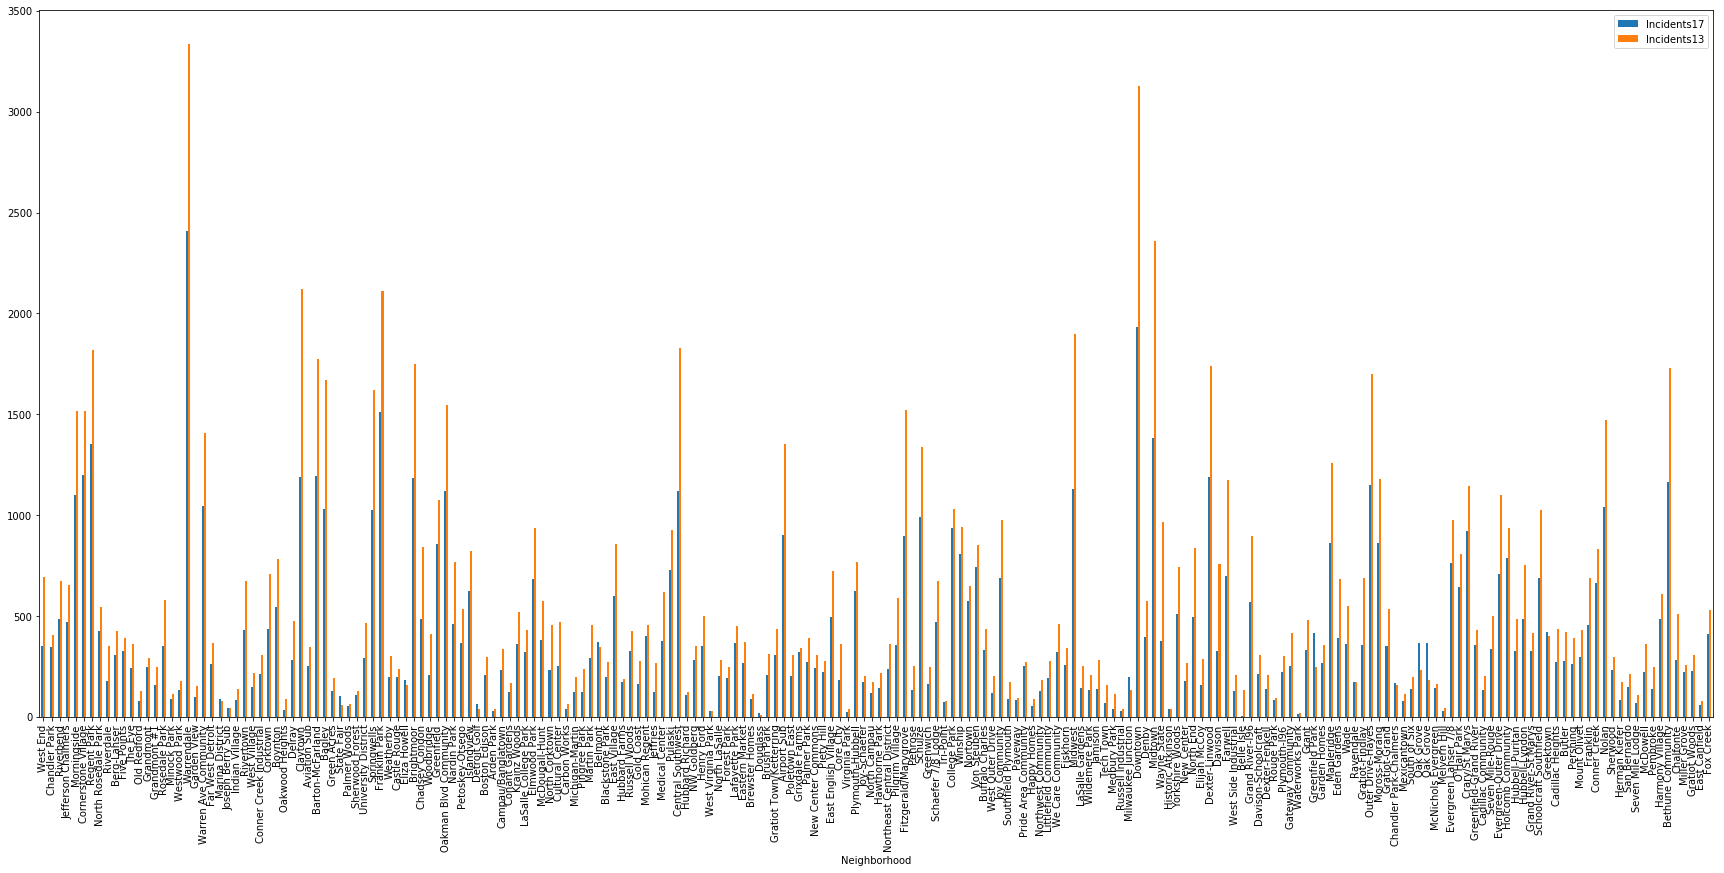

In [30]:
#plot crime: number of incidents for 2013 and 2017
DetCrime.plot(x="Neighborhood", y=["Incidents17", "Incidents13"], kind="bar", figsize=(30,13))


Calcaulte crime precentage change between 2013 and 2017 

In [31]:
# to do so we will apply to formula:    (new year – old year)/old year and then multiply the reault by 100.

# In our case: (incindets 2017) minus (incidents 2013) divided by (incidents 2013) , and multiplaid by 100
DetCrime['P_ChangeC'] = ((DetCrime['Incidents17'] - DetCrime['Incidents13']) / (DetCrime['Incidents13'] )* 100)

#how does it look like:
DetCrime.head()

,Neighborhood,Incidents17,Incidents13,P_ChangeC
0,West End,352,693,-49.206349
1,Chandler Park,346,405,-14.567901
2,Riverbend,487,675,-27.851852
3,Jefferson Chalmers,468,654,-28.440367
4,Morningside,1102,1514,-27.212682


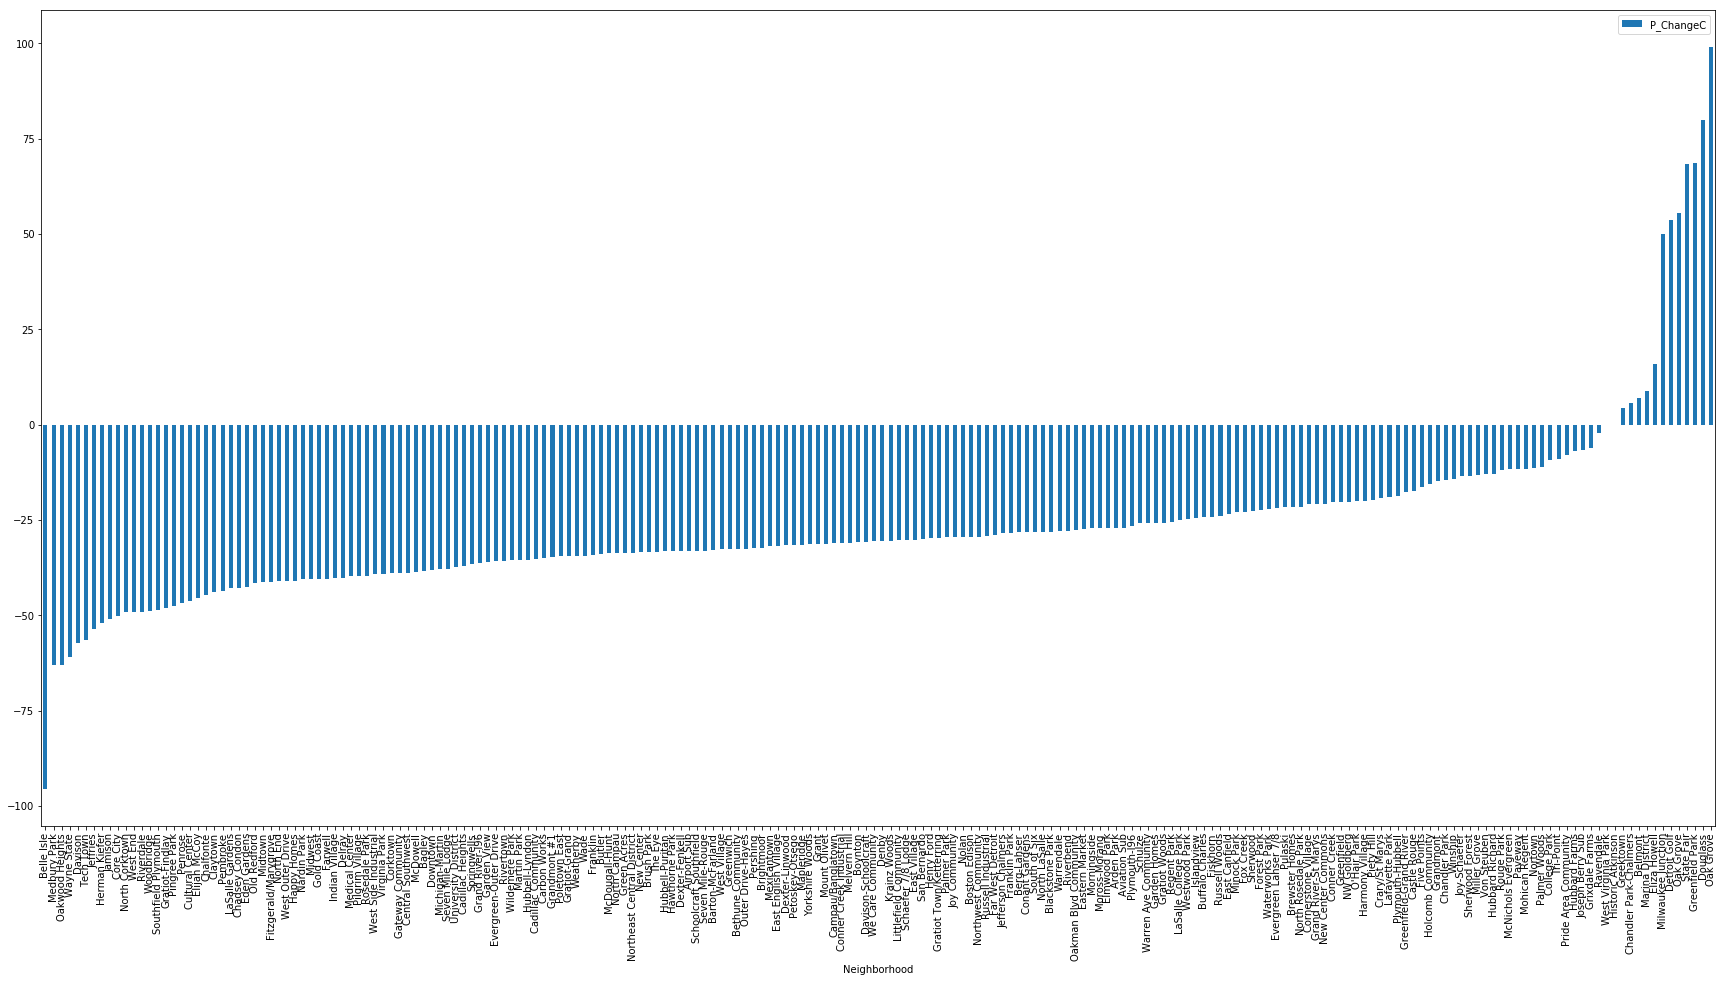

In [32]:

#Sort
DetCrime = DetCrime.sort_values(by='P_ChangeC')
#plot
DetCrime.plot(x="Neighborhood", y=["P_ChangeC"], kind="bar", figsize=(30,15))

What does this plot showing us?

#### Merge crime with demolitions data

In [33]:
# merge with demolitions data and look into the 20%

Basically each one of the columns reflects number of incidents since we applied a "count" 



In [34]:
#dem2['NumDemolitions'] = dem2['Address']  

In [35]:
# merge crime and demolitions data 
DetCrimeFinal = pd.merge(DetCrime,  Demolition_Area , on = 'Neighborhood', how = "inner")
DetCrimeFinal.head()

,Neighborhood,Incidents17,Incidents13,P_ChangeC,acres,DemCount,normalized_demo
0,Medbury Park,41,111,-63.063063,79.534606,2,25.146287
1,Oakwood Heights,33,89,-62.921348,620.012210,2,3.225743
2,Davison,324,756,-57.142857,645.631872,174,269.503424
3,Herman Kiefer,83,173,-52.023121,161.591038,89,550.773118
4,Jamison,138,281,-50.889680,154.757930,111,717.249191


In [36]:
DetCrimeFinal = DetCrimeFinal.sort_values(by='P_ChangeC')

Text(0.5,1,'Detroit Demolitions and Crime levels 13 to 17 (sorted by Crime)')

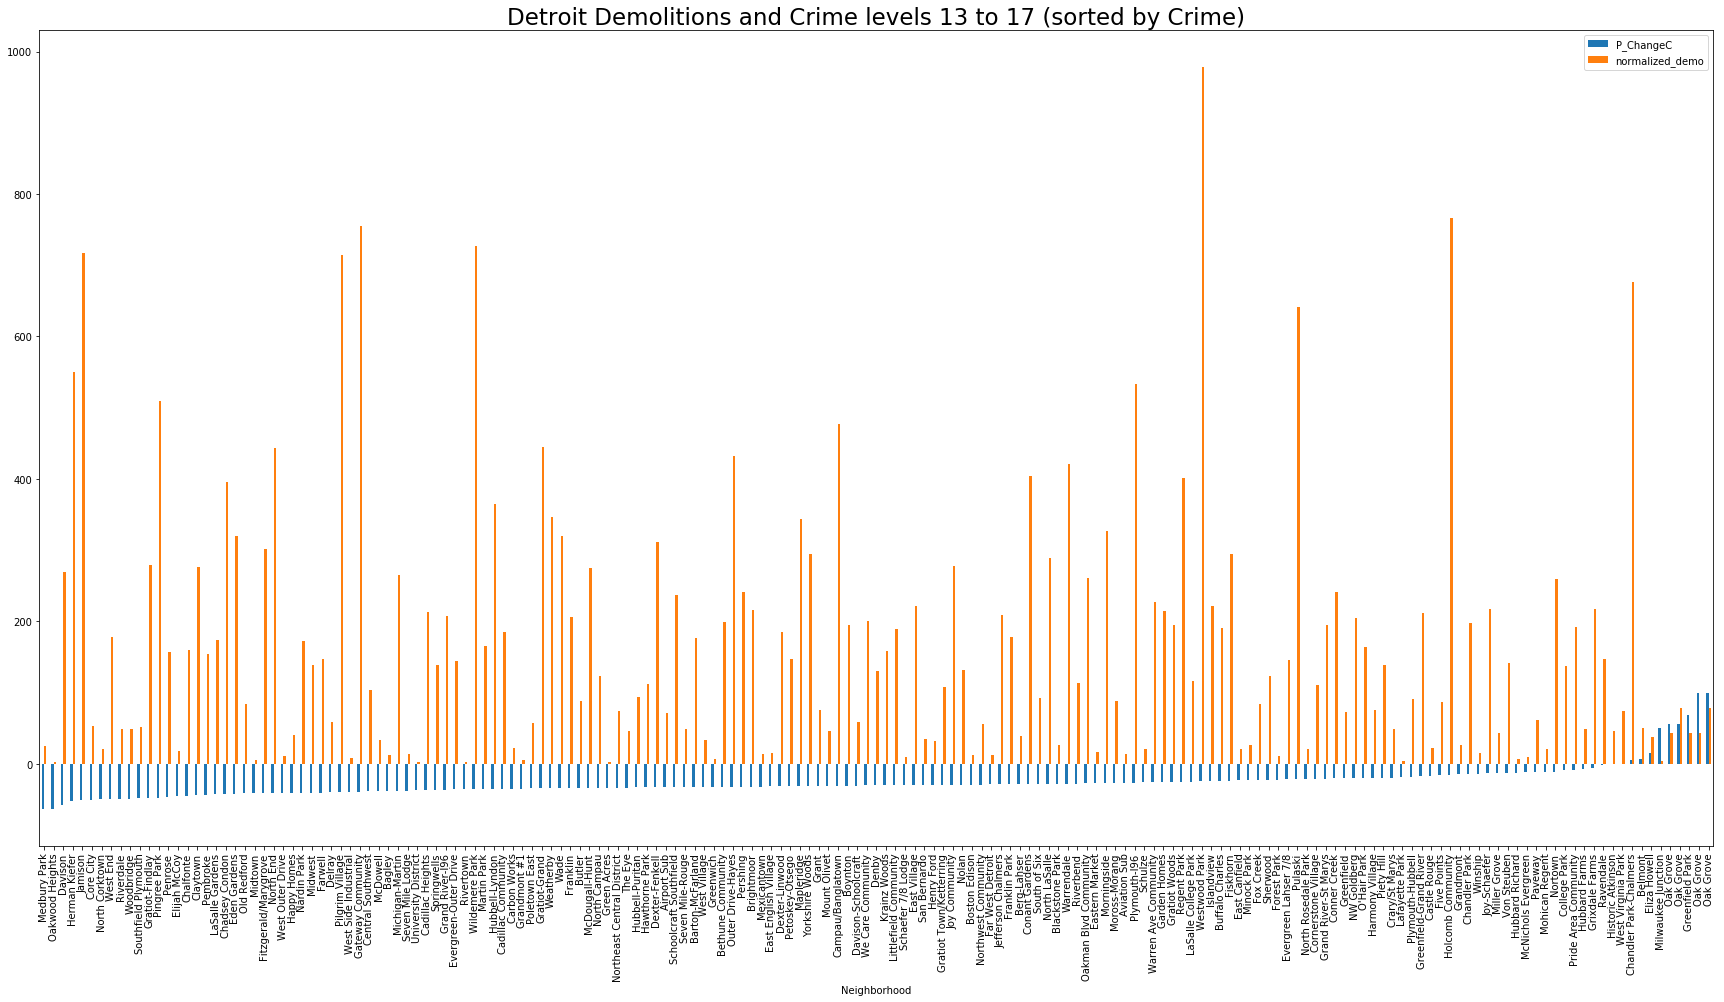

In [37]:

DetCrimeFinal.plot(x="Neighborhood", y=["P_ChangeC", "normalized_demo"], kind="bar", figsize=(30,15))
plt.title('Detroit Demolitions and Crime levels 13 to 17 (sorted by Crime)',  fontsize=23)


In [53]:
DetCrimeFinal = DetCrimeFinal.sort_values(by='normalized_demo')

Text(0.5,1,'Detroit Demolitions and Crime levels 13 to 17 (sorted by Demolitions)')

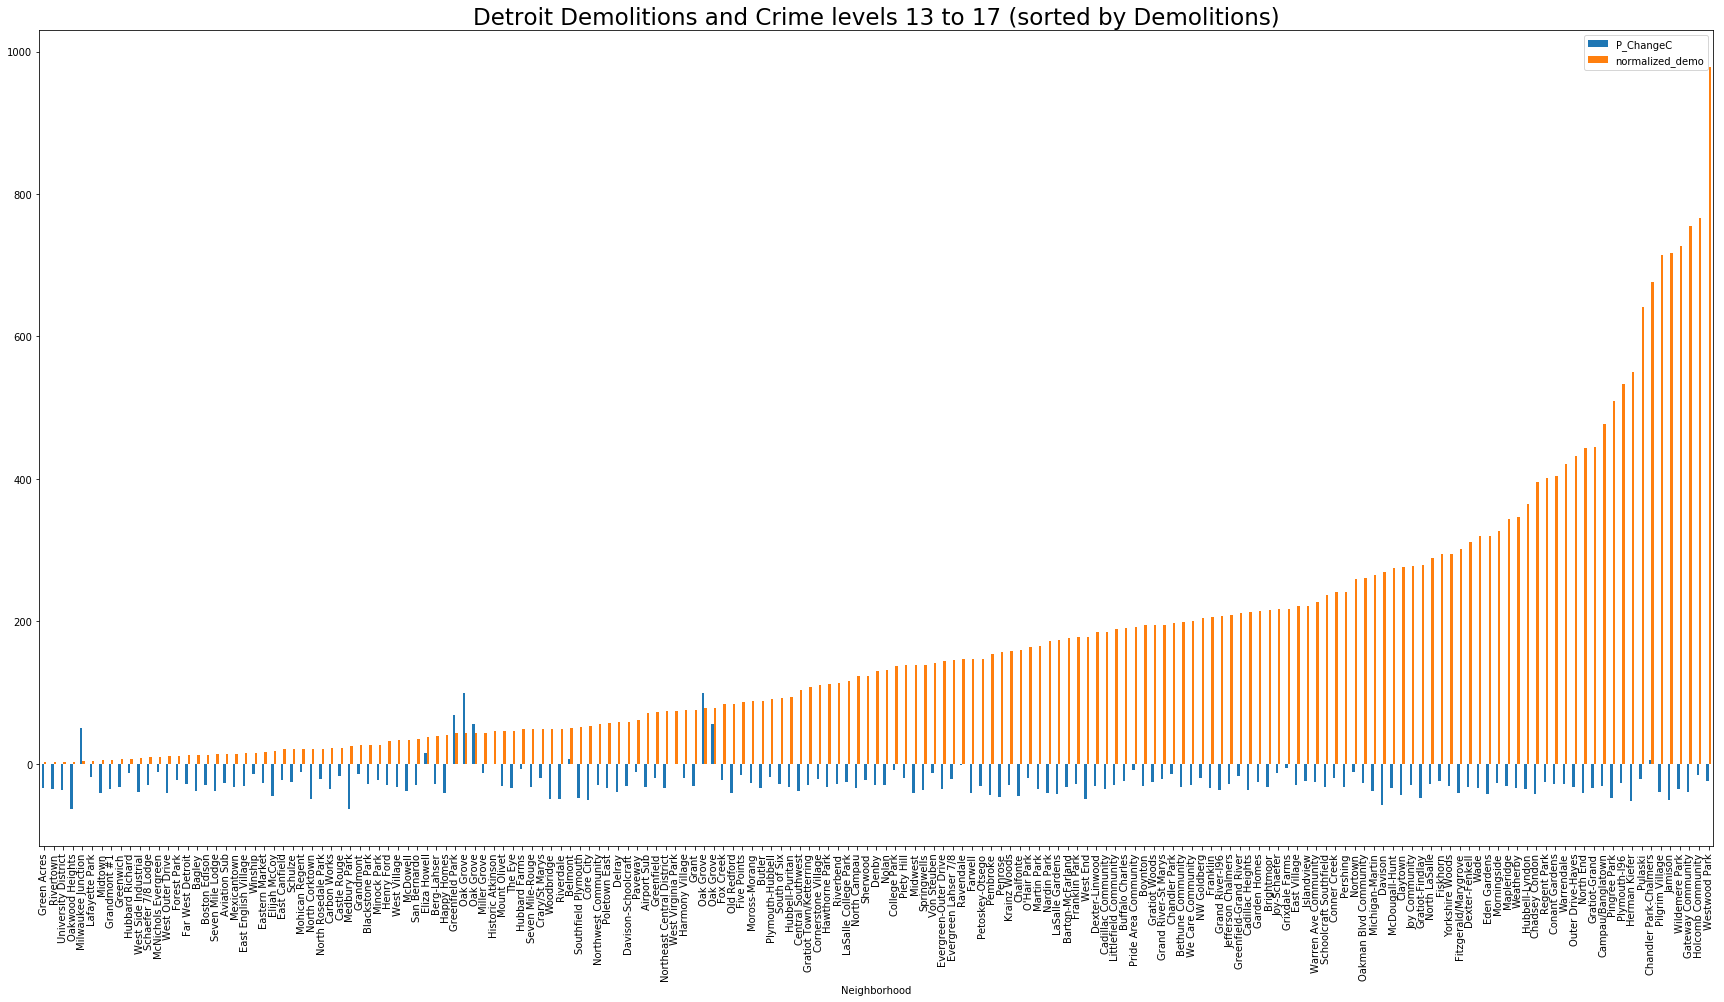

In [54]:
DetCrimeFinal.plot(x="Neighborhood", y=["P_ChangeC", "normalized_demo"], kind="bar", figsize=(30,15))
plt.title('Detroit Demolitions and Crime levels 13 to 17 (sorted by Demolitions)',  fontsize=23)


### b. Real Estate

Now let's look into Real Estate values. The estimated value of increase for *each* demolition is 4% in home value. We will be using another open dataset provided by the city of Detroit: the Parcel Point Ownership which is a record of all parcels in Detroit and information about them such as size, ownership and more. We will be using this data about sale amounts, we filtered the data into two: 1. parcel that were last sole during 2013 and 2. parcels that were in 2017. We did not use other parcels the were last sold in other years. Note that in a scenario were a parcel was sold once on 2013 and another time on 2017 it will only appear once in the data, since the data is only giving us the "last sale". 

The 2013 data consisted of 10738 unique sales and the 2017 had 8689 unique sales. Check out the notebook we used for this analysis here: 
https://github.com/avigailvantu/Detroit-prep/blob/master/Real_Estate_Detroit.ipynb

Similiar to the crime data, we aggragated  and everaged each neighbohood's sales amount for the two years.


In [40]:
#Load data:
ParcelSale = pd.read_csv('Sales13_17.csv')
#show data
ParcelSale.head()

,Unnamed: 0,Neighborhood,MeanSale17,MeanSale13
0,0,Airport Sub,28121.0,13773.0
1,1,Arden Park,244500.0,50000.0
2,2,Aviation Sub,41075.0,36986.0
3,3,Bagley,58610.0,32598.0
4,4,Barton-McFarland,32127.0,32816.0


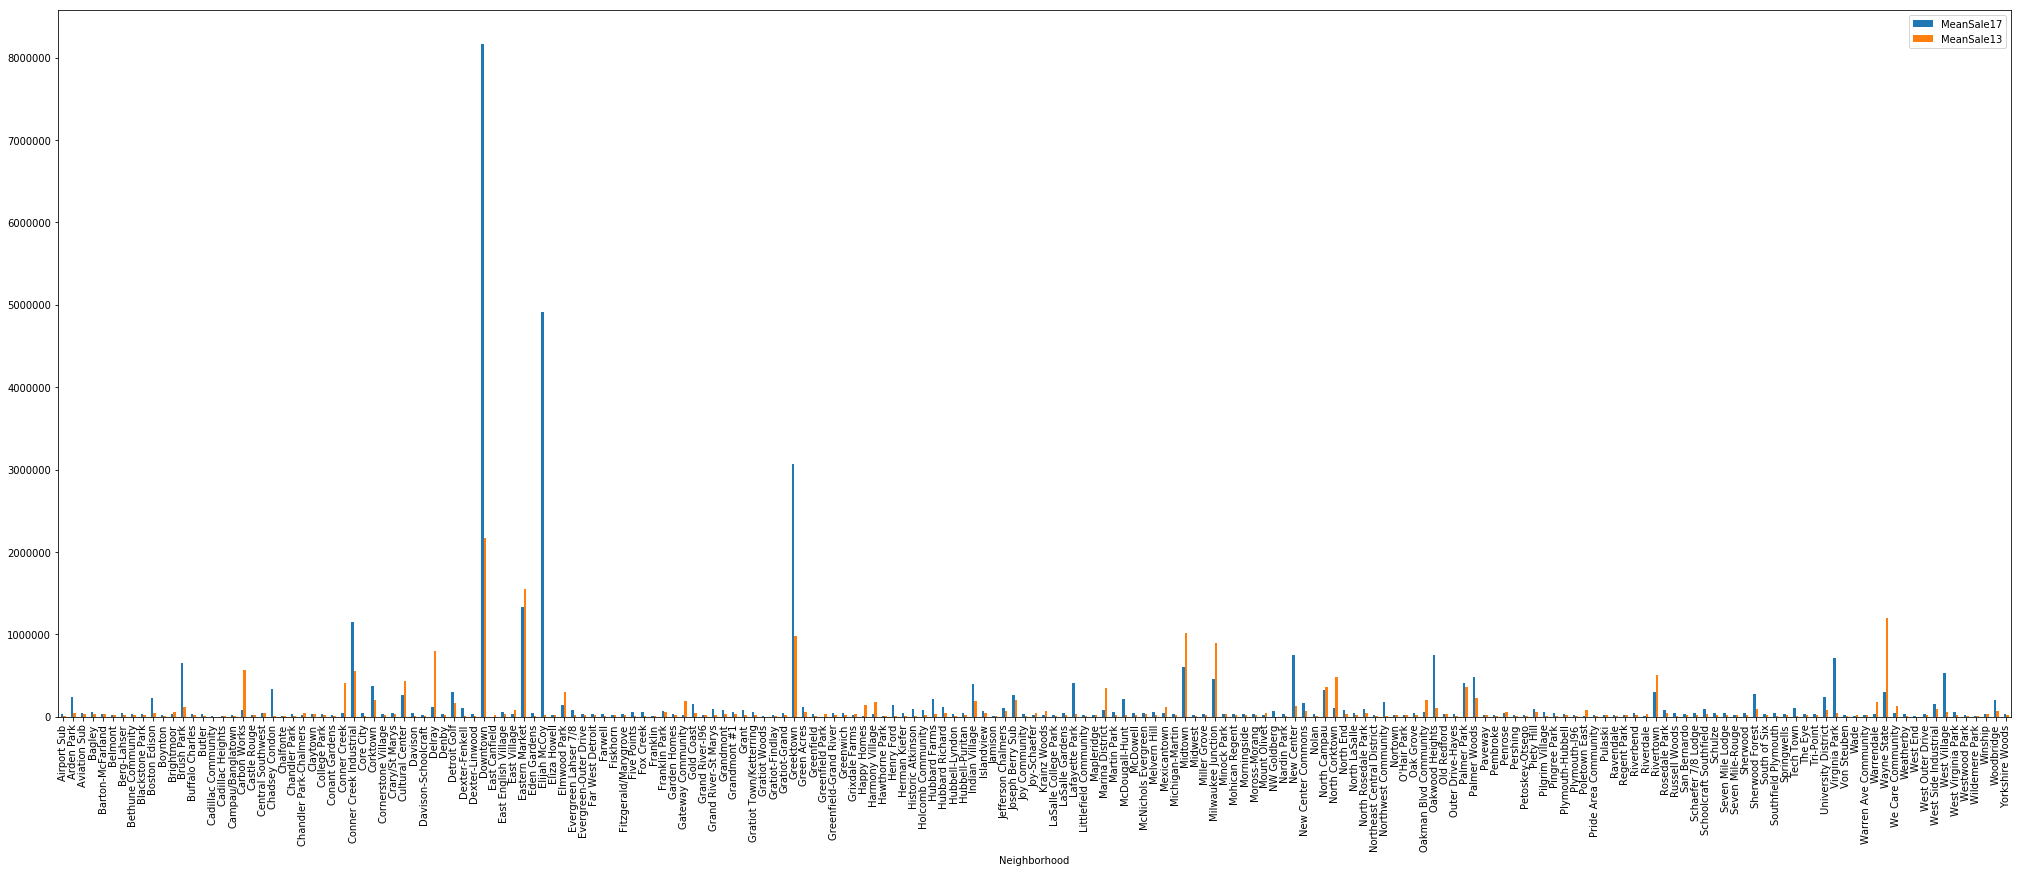

In [41]:
#Plot data 
ParcelSale.plot(x="Neighborhood", y=["MeanSale17", "MeanSale13"], kind="bar", figsize=(35,13))


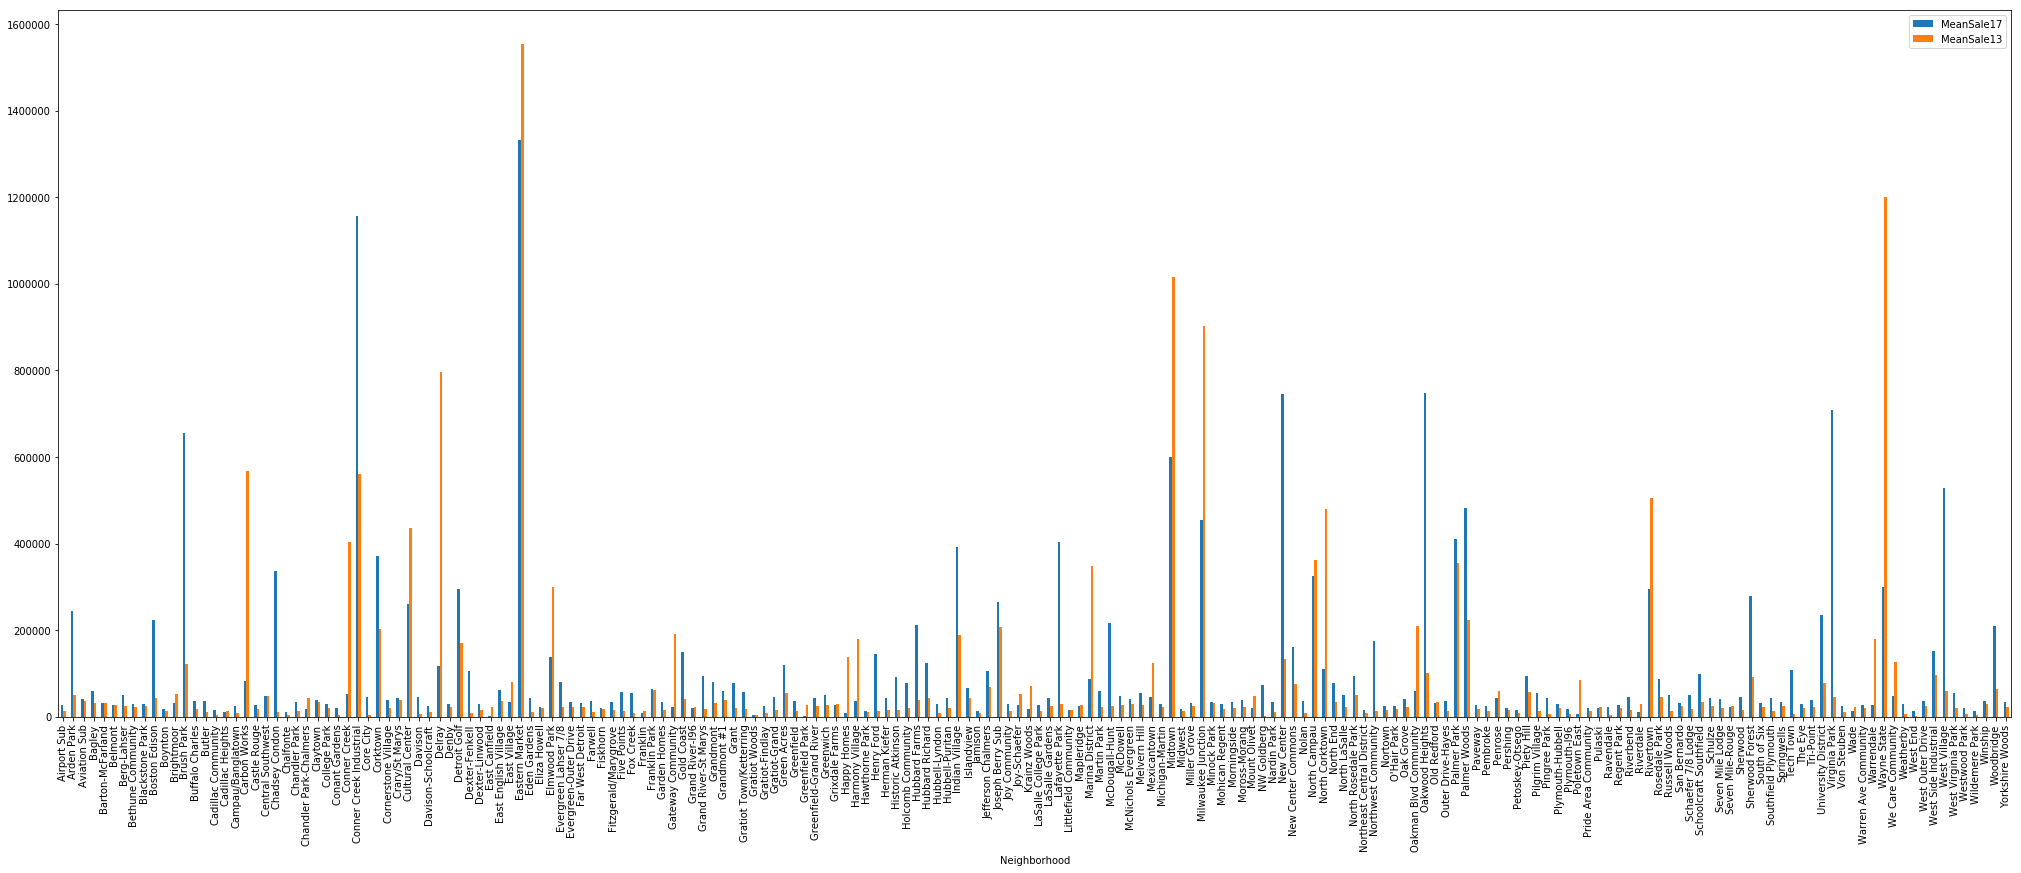

In [42]:
#remove outliers for plotting: 
ParcelSale = ParcelSale[ParcelSale["MeanSale17"]  < 1500000 ]
ParcelSale.plot(x="Neighborhood", y=["MeanSale17", "MeanSale13"], kind="bar", figsize=(35,13))


## Housing Prices Calculate % Change

In order to try and make conclusions about the impact of the demolitions policy on parcel sales in Detroit we want to clacluate % change, similrarly to how we worked with the crime data. Note that we are not adjusting sale rates to inflation and the fact that $X 4 years ago are worth less than $X today.  

### Task 3: 
Your task is to calculate the precentage change from 2013 (baseline) to 2017 (most recent year) 
Hint 1: remember the formula we applied on crime:   

(new year – old year)/old year and then multiply the reault by 100.

In our case: (mean sale rate 2017) minus (mean sale rate 2013) divided by (mean sale rate 2013) , and multiplaid by 100

Hint 2: if you are stuck try going back to the crime % change calculation

* use ParcelSale as your DataFrame


In [43]:
# <your code>

In [44]:
#can remove later

ParcelSale['P_ChangeR'] = ((ParcelSale['MeanSale17'] - ParcelSale['MeanSale13']) / (ParcelSale['MeanSale13'] )* 100)

#how does it look like:
ParcelSale.head()

,Unnamed: 0,Neighborhood,MeanSale17,MeanSale13,P_ChangeR
0,0,Airport Sub,28121.0,13773.0,104.174835
1,1,Arden Park,244500.0,50000.0,389.000000
2,2,Aviation Sub,41075.0,36986.0,11.055535
3,3,Bagley,58610.0,32598.0,79.796307
4,4,Barton-McFarland,32127.0,32816.0,-2.099586


#### Plot

In [45]:
## merge with demolitions and data and crime 
DetCrimeSale = pd.merge(DetCrimeFinal,  ParcelSale, on = 'Neighborhood', how = "inner")

DetCrimeSale.head()

,Neighborhood,Incidents17,Incidents13,P_ChangeC,acres,DemCount,normalized_demo,Unnamed: 0,MeanSale17,MeanSale13,P_ChangeR
0,Green Acres,128,193,-33.678756,355.497459,1,2.812960,74,119340.0,53983.0,121.069596
1,Greenwich,165,245,-32.653061,159.581950,1,6.266373,78,49481.0,27899.0,77.357611
2,Mexicantown,77,113,-31.858407,74.065537,1,13.501556,110,45280.0,124823.0,-63.724634
3,Rivertown,432,671,-35.618480,352.337377,1,2.838189,159,296091.0,504758.0,-41.340008
4,Milwaukee Junction,198,132,50.000000,252.586824,1,3.959035,115,453625.0,901760.0,-49.695595


In [46]:
#sort by % change in real estate $$ 
DetCrimeSale = DetCrimeSale.sort_values(by='P_ChangeR')
DetCrimeSale = DetCrimeSale[DetCrimeSale["P_ChangeR"]  < 1500 ]

Text(0.5,1,'Detroit Demolitions and Real Estate Sales levels 13 to 17 (sorted by Sales % change)')

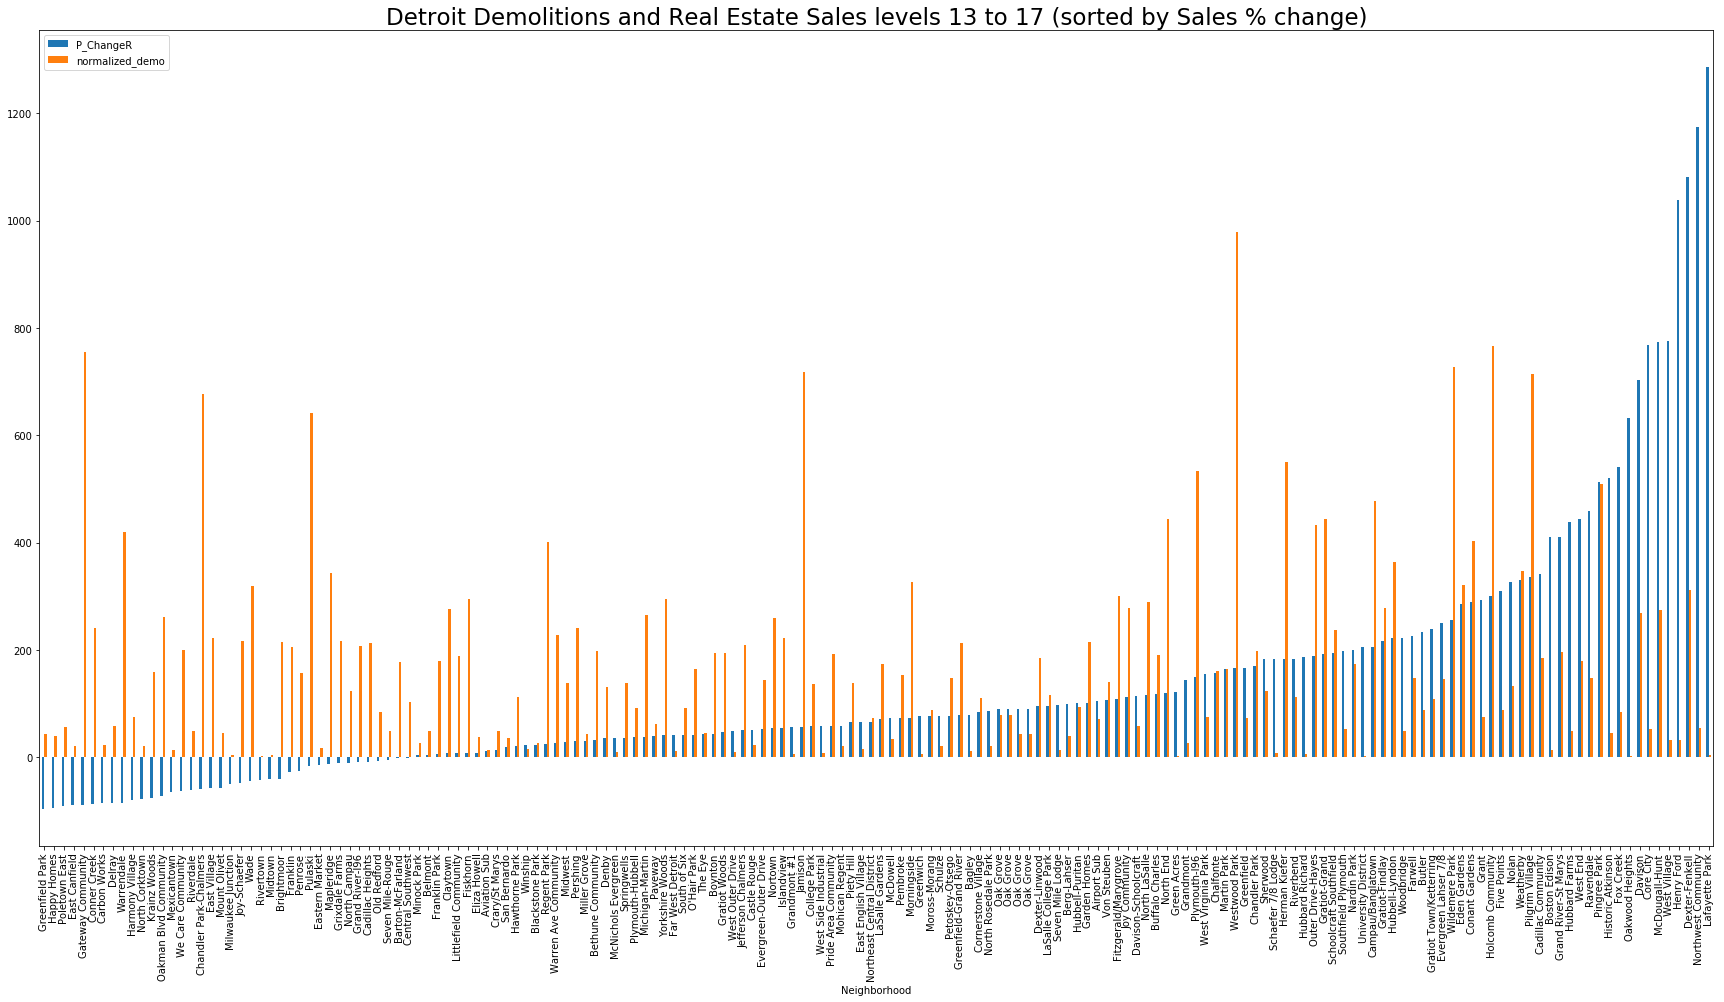

In [47]:

DetCrimeSale.plot(x="Neighborhood", y=["P_ChangeR", "normalized_demo"], kind="bar", figsize=(30,15))
plt.title('Detroit Demolitions and Real Estate Sales levels 13 to 17 (sorted by Sales % change)',  fontsize=23)

In [48]:
#sort again by number of demolitions 
DetCrimeSale = DetCrimeSale.sort_values(by='normalized_demo')

Text(0.5,1,'Detroit Demolitions and Real Estate Sales levels 13 to 17 (sorted by normalized demolitions )')

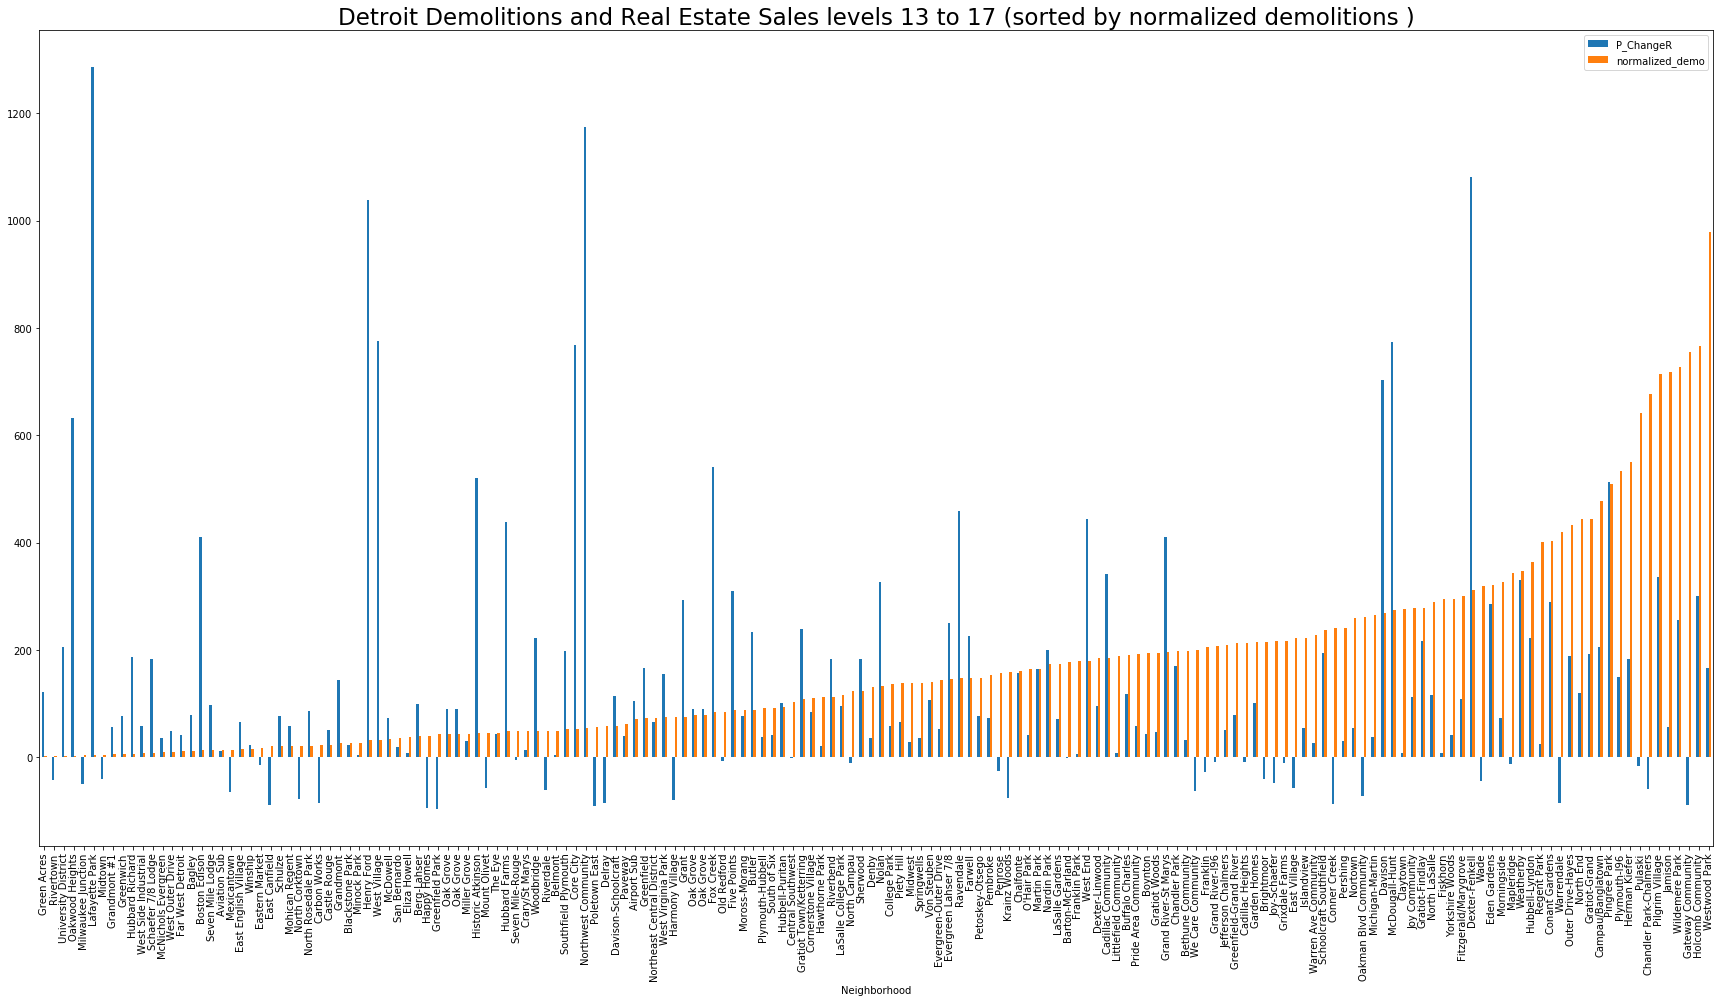

In [49]:
#plot again:

DetCrimeSale.plot(x="Neighborhood", y=["P_ChangeR", "normalized_demo"], kind="bar", figsize=(30,15))
plt.title('Detroit Demolitions and Real Estate Sales levels 13 to 17 (sorted by normalized demolitions )',  fontsize=23)

## 4. ?? 311 improve detroit demolitions related data

### Task 4: individual exploration 

## 5. Conclusions / Discussion  

## 6. Survey 


#### Thank you for participating in our workshop! It would be very helpful for us if you could take a few minutes to fill out a survey to provide feedback about your experience. 

Q1. Did you had any previous data analytics / visualizations experience? 

< your answer>

Q2. Are you from Detroit or very familiar with the city?  

< your answer>

Q3. What is the most interesting thing you learned throughout the workshop ? 

< your answer>

Q4. Why were you drawn to this Open Demolitions workshop in the first place?  

< your answer>

Q5. Did the workshop fulfil your what you hoped to achieve?   

< your answer>

Q6. If you could add one more section to the workshop, what would that be? 

< your answer>

### Thank You! 